In [1]:
import starry
import numpy as np
import matplotlib as mpl


import theano
theano.config.gcc__cxxflags += " -fexceptions"

starry.config.lazy = False
starry.config.quiet = True

In [2]:
contrast = 0.45
radius = 10
map = starry.Map(ydeg=30,udeg=2)
map[1]=0.05
# map[1]=0.5
map[2]=0.15
# map[2]=0.9
map.spot(contrast=contrast, radius=radius, lat=0 , lon = -20)
# A_y = np.array(map.y[1:])


map.spot(contrast=0.45, radius=10, lat=0 , lon = 40)

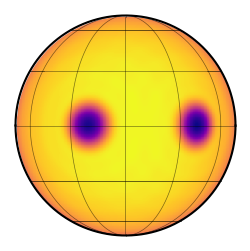

In [3]:
map.show()

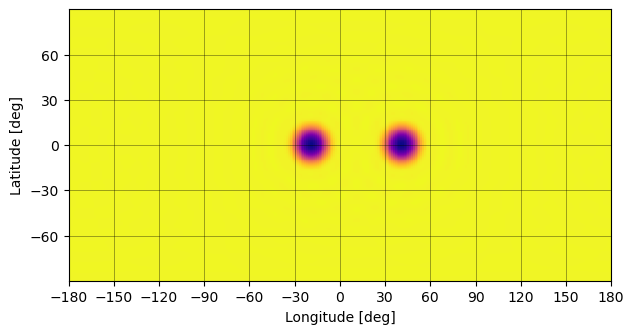

In [4]:
map.show(projection='rect')

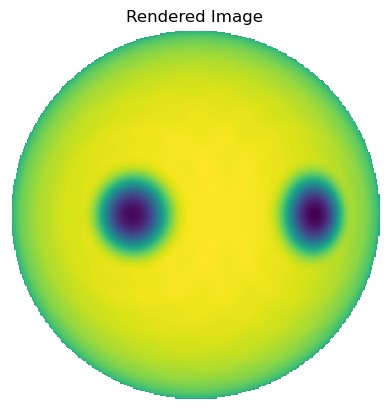

In [5]:
import matplotlib.pyplot as plt

img_array=map.render(res=300,projection='ortho',theta=0.0)

#Plot img_array as an image
plt.imshow(img_array)
plt.axis('off') # Turn off axis labels and ticks
plt.title("Rendered Image") # Add a title (optional)
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

Text(0, 0.5, 'intensity')

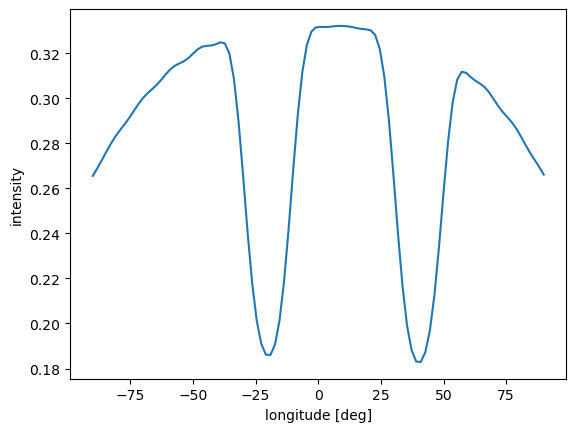

In [7]:
import matplotlib.pyplot as plt
# Lets look at what the spot contrast implies for the intensity of the points

lon = np.linspace(-90, 90, 100)
plt.plot(lon, map.intensity(lon=lon))
plt.xlabel("longitude [deg]")
plt.ylabel("intensity")

Text(0, 0.5, 'normalized intensity')

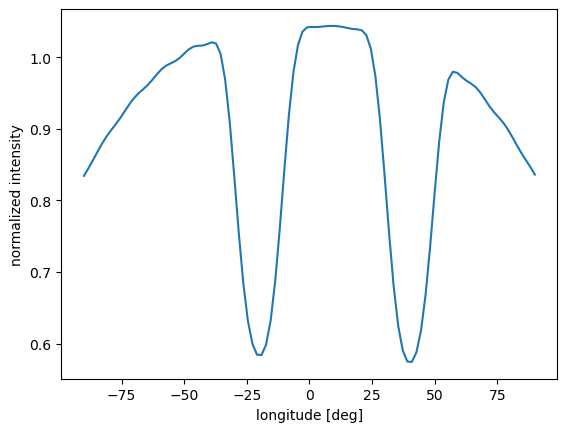

In [8]:
# If we normalize so that the max is 1
plt.plot(lon, np.pi * map.intensity(lon=lon))
plt.xlabel("longitude [deg]")
plt.ylabel("normalized intensity")

In [9]:
print(map.flux.__doc__)


        Compute and return the light curve.

        Args:
            xo (scalar or vector, optional): x coordinate of the occultor
                relative to this body in units of this body's radius.
            yo (scalar or vector, optional): y coordinate of the occultor
                relative to this body in units of this body's radius.
            zo (scalar or vector, optional): z coordinate of the occultor
                relative to this body in units of this body's radius.
            ro (scalar, optional): Radius of the occultor in units of
                this body's radius.
            theta (scalar or vector, optional): Angular phase of the body
                in units of :py:attr:`angle_unit`.
            integrated (bool, optional): If True, dots the flux with the
                amplitude. Default False, in which case this returns a
                2d array (wavelength-dependent maps only).
        


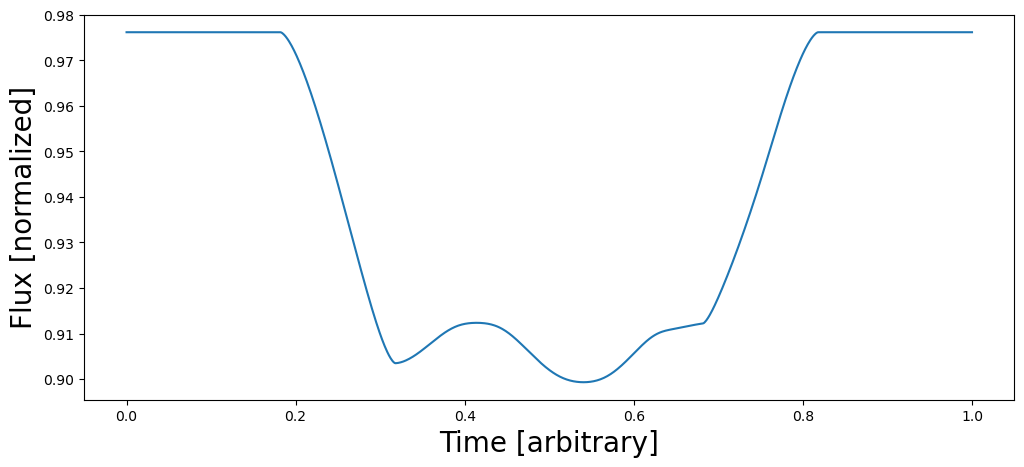

In [10]:
# Set the occultor trajectory
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
# yo = np.linspace(-0.3, 0.3, npts)
yo=  np.zeros_like(xo)
zo = 1.0
ro = 0.272

# # Load the map of the Earth
# map = starry.Map(ydeg=20)
# map.load("earth", sigma=0.08)

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
flux_moon = map.flux(xo=xo, yo=yo, ro=ro, zo=zo)
plt.plot(time, flux_moon)
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20)

# flux_moon as light_curve_1
light_curve_1 = flux_moon
np.save("light_curve_1.npy", light_curve_1)
np.save("time_lc_1.npy", time)

plt.show() # Add this line to display the plot if you haven't already

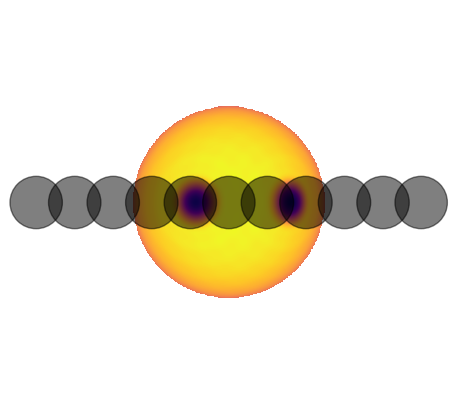

In [11]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axis("off")
ax.imshow(map.render(), origin="lower", cmap="plasma", extent=(-1, 1, -1, 1))
for n in list(range(0, npts, npts // 10)) + [npts - 1]:
    circ = plt.Circle(
        (xo[n], yo[n]), radius=ro, color="k", fill=True, clip_on=False, alpha=0.5
    )
    ax.add_patch(circ)

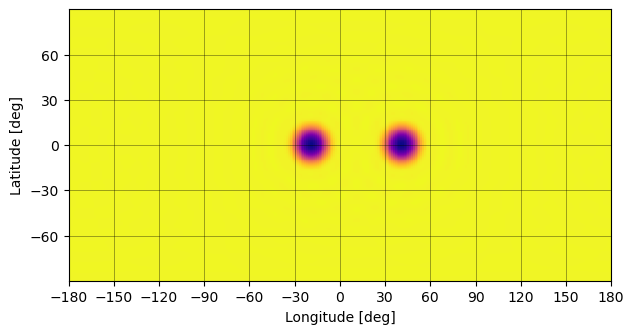

In [12]:
map.show(projection="rect")

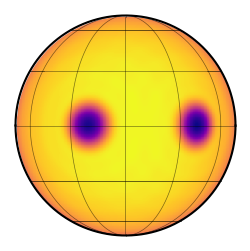

In [13]:
map.show(projection="ortho")

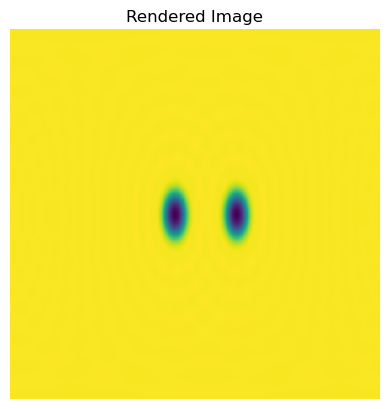

In [14]:
import matplotlib.pyplot as plt

img_array=map.render(res=300,projection='rect',theta=0.0)

#Plot img_array as an image
plt.imshow(img_array)
plt.axis('off') # Turn off axis labels and ticks
plt.title("Rendered Image") # Add a title (optional)
plt.show()

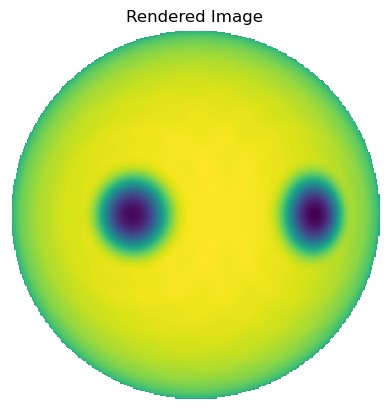

In [15]:
import matplotlib.pyplot as plt

img_array=map.render(res=300,projection='ortho',theta=0.0)

#Plot img_array as an image
plt.imshow(img_array)
plt.axis('off') # Turn off axis labels and ticks
plt.title("Rendered Image") # Add a title (optional)
plt.show()

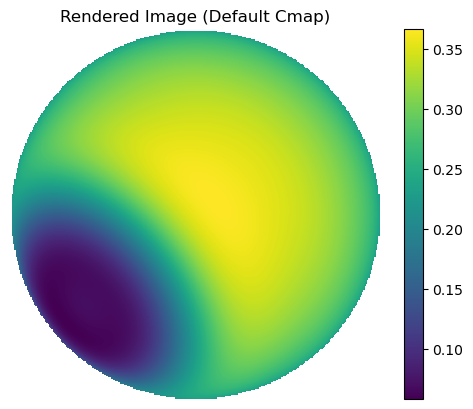

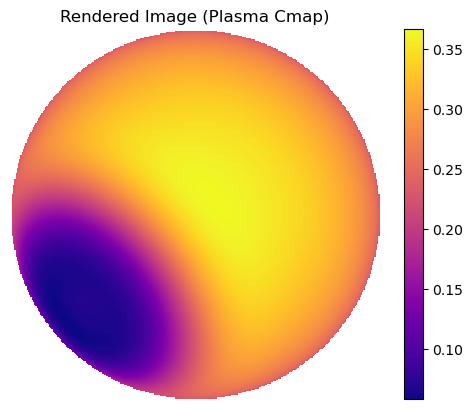

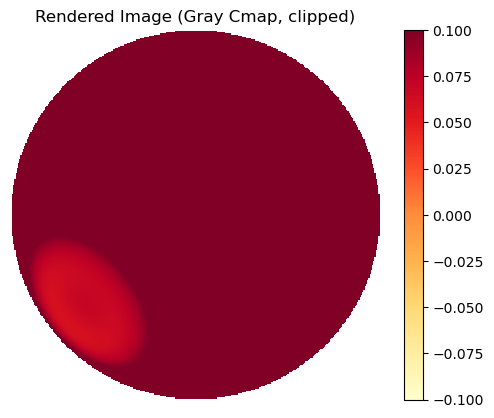

In [16]:
import starry
import matplotlib.pyplot as plt
import numpy as np # Import numpy for potential vmin/vmax later

# 1. Create a map (example with a spot)
map = starry.Map(ydeg=10,udeg=2)
map.add_spot(intensity=-0.8, sigma=0.15, lat=30, lon=-45)
map[1] = 0.4 # Add some limb darkening

# 2. Render the map to get the intensity array
img_array = map.render(res=300, projection='ortho', theta=0.0)

# --- Plotting with different colormaps ---

# 3a. Plot using the default matplotlib colormap ('viridis' usually)
plt.figure()
plt.imshow(img_array)
plt.axis('off')
plt.title("Rendered Image (Default Cmap)")
plt.colorbar() # Add a colorbar to see the intensity scale
plt.show()

# 3b. Plot using a specific colormap (e.g., 'plasma', 'gray', 'hot', etc.)
plt.figure()
plt.imshow(img_array, cmap='plasma') # <--- CHANGE COLORMAP HERE
plt.axis('off')
plt.title("Rendered Image (Plasma Cmap)")
plt.colorbar()
plt.show()

# 3c. Plot using another colormap and potentially adjust value range
# Sometimes spots can make the range very large, you might want to clip it
min_val = np.percentile(img_array, 1)  # Clip lowest 1%
max_val = np.percentile(img_array, 99) # Clip highest 1%

plt.figure()
plt.imshow(img_array, cmap='YlOrRd', vmin=min_val, vmax=max_val) # <--- Change cmap and set vmin/vmax
plt.axis('off')
plt.title("Rendered Image (Gray Cmap, clipped)")
plt.colorbar()
plt.show()

---